In [1]:
!pip install opencv-python

In [18]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
dir='C:\\Users\\HP\\Desktop\\plant des\\PlantVillage'

In [20]:
categories=['Potato___Early_blight','Potato___healthy','Potato___Late_blight']

In [21]:
data=[]
for i in categories:
    path=os.path.join(dir,i)
    label= categories.index(i)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        plant_img=cv2.imread(imgpath,0)
        try:
            plant_img=cv2.resize(plant_img,(50,50))
            image=np.array(plant_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass
        

In [22]:
print(len(data))

2152


In [23]:
import pickle

In [24]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [25]:
import random
random.shuffle(data)
features=[]
labels=[]
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [27]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [28]:
pick=open('medel.sav','wb')
pickle.dump(model,pick)
pick.close()

In [29]:
prediction=model.predict(x_test)

In [30]:
accuracy=model.score(x_test,y_test)

In [31]:
accuracy

0.8468677494199536

Prediction is: Potato___Early_blight


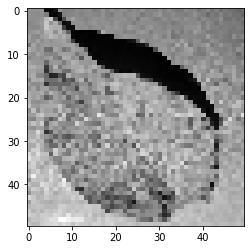

In [32]:
mypet=x_test[0].reshape(50,50)
print('Prediction is:',categories[prediction[0]])
plt.imshow(mypet,cmap='gray')
plt.show()